In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the Data & Explore the Main Data (EDA) 

In [3]:
# Step 2: Load the Main Data Files
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

# Step 3: Load the Additional Data Files
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv')

In [4]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
numeric_features = train_data.select_dtypes(include='number').columns
train_data[numeric_features].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# # Visualize the target variable (imbalanced data)

In [7]:
(train_data['TARGET'].value_counts() / len(train_data)).to_frame()


,count
TARGET,
0,0.919271
1,0.080729


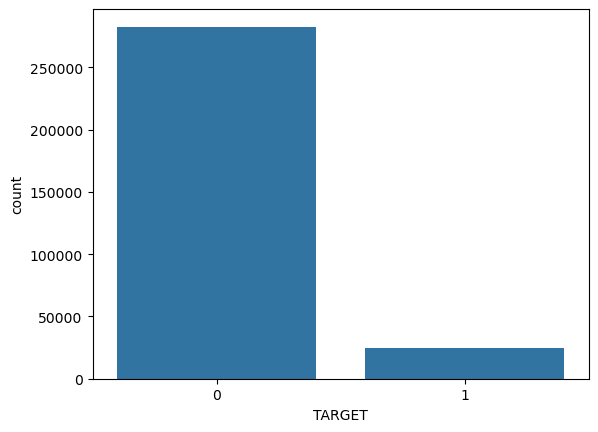

In [8]:
sns.countplot(train_data, x="TARGET")
plt.show()

Target distribution: TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


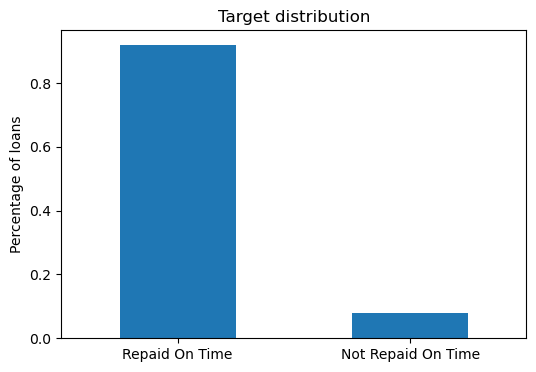

In [9]:
target_dist = train_data['TARGET'].value_counts(normalize=True)

print("Target distribution: {}".format(target_dist))

target_dist.plot(kind='bar', figsize=(6, 4))
plt.title('Target distribution')
plt.ylabel('Percentage of loans')
plt.xlabel('')
plt.xticks((0, 1), ['Repaid On Time', 'Not Repaid On Time'])
plt.xticks(rotation=0)
plt.show()

# Aggregate Features

In [12]:
# Step 5: Aggregate Features from Additional Files

# Bureau Data Aggregation
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['mean', 'sum', 'max'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean', 'sum'],
    'CNT_CREDIT_PROLONG': 'sum',
    'DAYS_CREDIT': ['mean', 'max', 'min'],
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum()
})
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns]

# Bureau Balance Data Aggregation
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['min', 'max', 'size'],
    'STATUS': lambda x: (x == '1').sum()  # Count overdue months
})
bureau_balance_agg.columns = ['_'.join(col).strip() for col in bureau_balance_agg.columns]

# Previous Applications Data Aggregation
previous_agg = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'min', 'max'],
    'AMT_CREDIT': ['mean', 'min', 'max'],
    'NAME_CONTRACT_STATUS': lambda x: (x == 'Approved').sum(),  # Count approvals
    'DAYS_DECISION': ['mean', 'min', 'max']
})
previous_agg.columns = ['_'.join(col).strip() for col in previous_agg.columns]

# POS Cash Balance Data Aggregation
pos_cash_agg = pos_cash.groupby('SK_ID_CURR').agg({
    'SK_DPD': ['mean', 'sum', 'max'],  # Days overdue
    'MONTHS_BALANCE': ['size', 'min', 'max']
})
pos_cash_agg.columns = ['_'.join(col).strip() for col in pos_cash_agg.columns]

# Credit Card Balance Data Aggregation
credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'SK_DPD': ['mean', 'sum', 'max'],  # Days overdue
    'AMT_BALANCE': ['mean', 'sum', 'max'],
    'MONTHS_BALANCE': ['size', 'min', 'max']
})
credit_card_agg.columns = ['_'.join(col).strip() for col in credit_card_agg.columns]

# Installments Payments Data Aggregation
installments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'AMT_INSTALMENT': ['mean', 'sum', 'max'],
    'DAYS_INSTALMENT': ['mean', 'min', 'max'],
    'AMT_PAYMENT': ['mean', 'sum', 'max'],
    'DAYS_ENTRY_PAYMENT': ['mean', 'min', 'max']  # When the payment was made
})
installments_agg.columns = ['_'.join(col).strip() for col in installments_agg.columns]

In [13]:
# Step 6: Merge the Aggregated Data with the Main Train Table
train_data = train_data.merge(bureau_agg, on='SK_ID_CURR', how='left')
train_data = train_data.merge(previous_agg, on='SK_ID_CURR', how='left')
train_data = train_data.merge(pos_cash_agg, on='SK_ID_CURR', how='left')
train_data = train_data.merge(credit_card_agg, on='SK_ID_CURR', how='left')
train_data = train_data.merge(installments_agg, on='SK_ID_CURR', how='left')


In [20]:
# Step 12: Prepare the Test Data for Prediction
# Repeat similar steps for test data
# Merging dataframes with suffixes to avoid column name conflicts
test_data = test_data.merge(bureau_agg, on='SK_ID_CURR', how='left')
test_data = test_data.merge(previous_agg, on='SK_ID_CURR', how='left')
test_data = test_data.merge(pos_cash_agg, on='SK_ID_CURR', how='left')
test_data = test_data.merge(credit_card_agg, on='SK_ID_CURR', how='left')
test_data = test_data.merge(installments_agg, on='SK_ID_CURR', how='left')


In [24]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_INSTALMENT_max,DAYS_INSTALMENT_mean,DAYS_INSTALMENT_min,DAYS_INSTALMENT_max,AMT_PAYMENT_mean,AMT_PAYMENT_sum,AMT_PAYMENT_max,DAYS_ENTRY_PAYMENT_mean,DAYS_ENTRY_PAYMENT_min,DAYS_ENTRY_PAYMENT_max
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,53093.745,-295.000000,-565.0,-25.0,11559.247105,219625.695,53093.745,-315.421053,-587.0,-49.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,560835.360,-1378.160000,-2310.0,-536.0,64754.586000,1618864.650,560835.360,-1385.320000,-2324.0,-544.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,10573.965,-754.000000,-784.0,-724.0,7096.155000,21288.465,10573.965,-761.666667,-795.0,-727.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,691786.890,-252.250000,-545.0,-11.0,62947.088438,1007153.415,691786.890,-271.625000,-575.0,-12.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,22678.785,-1028.606061,-2326.0,-14.0,12214.060227,806127.975,22678.785,-1032.242424,-2318.0,-14.0


# dataset's missing values

In [27]:
train_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [29]:
# Function to extract list of missing values
def missing_values(df):
    # Calculate the list of missing values
    mv_list = df.isna().sum()
    
    # Calculate the percentage of missing values in given feature
    mv_list_percentage = df.isna().sum() / len(df) * 100
    
    # Create a table
    mv_table = pd.concat([mv_list, mv_list_percentage], axis=1)
    
    # Rename the columns
    mv_table = mv_table.rename(columns={0: 'Missing feature name', 1: '% of Total values'})
    
    # Sort table entries to Ascending manner
    mv_table = mv_table[mv_table['Missing feature name'] != 0].sort_values('% of Total values', kind='quicksort', ascending=False)
    
    # Print summary
    print("DataFrame has {} columns with missing values.".format(mv_table.shape[0]))
    
    return mv_table

In [31]:
# Print train dataset missing values stats
missing_values_train = missing_values(train_data)
missing_values_train.head(20)

DataFrame has 114 columns with missing values.


,Missing feature name,% of Total values
AMT_BALANCE_sum,220606,71.739222
SK_DPD_max_y,220606,71.739222
MONTHS_BALANCE_max_y,220606,71.739222
SK_DPD_mean_y,220606,71.739222
MONTHS_BALANCE_min_y,220606,71.739222
AMT_BALANCE_max,220606,71.739222
MONTHS_BALANCE_size_y,220606,71.739222
SK_DPD_sum_y,220606,71.739222
AMT_BALANCE_mean,220606,71.739222
COMMONAREA_MODE,214865,69.872297


In [32]:
categorical_features = train_data.select_dtypes('object')
missing_categorical_features = missing_values(categorical_features)
print(missing_categorical_features)

DataFrame has 6 columns with missing values.
                     Missing feature name  % of Total values
FONDKAPREMONT_MODE                 210295          68.386172
WALLSMATERIAL_MODE                 156341          50.840783
HOUSETYPE_MODE                     154297          50.176091
EMERGENCYSTATE_MODE                145755          47.398304
OCCUPATION_TYPE                     96391          31.345545
NAME_TYPE_SUITE                      1292           0.420148


In [35]:
numeric_features = train_data.select_dtypes(include=['int64', 'float64'])
missing_numeric_features = missing_values(numeric_features)
print(missing_numeric_features)

DataFrame has 108 columns with missing values.
                        Missing feature name  % of Total values
SK_DPD_sum_y                          220606          71.739222
SK_DPD_mean_y                         220606          71.739222
AMT_BALANCE_mean                      220606          71.739222
MONTHS_BALANCE_max_y                  220606          71.739222
AMT_BALANCE_sum                       220606          71.739222
...                                      ...                ...
EXT_SOURCE_2                             660           0.214626
AMT_GOODS_PRICE                          278           0.090403
AMT_ANNUITY                               12           0.003902
CNT_FAM_MEMBERS                            2           0.000650
DAYS_LAST_PHONE_CHANGE                     1           0.000325

[108 rows x 2 columns]


In [36]:
# Print test dataset missing values stats
missing_values_test = missing_values(test_data)
missing_values_test.head(20)

DataFrame has 111 columns with missing values.


,Missing feature name,% of Total values
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_AVG,32780,67.249302


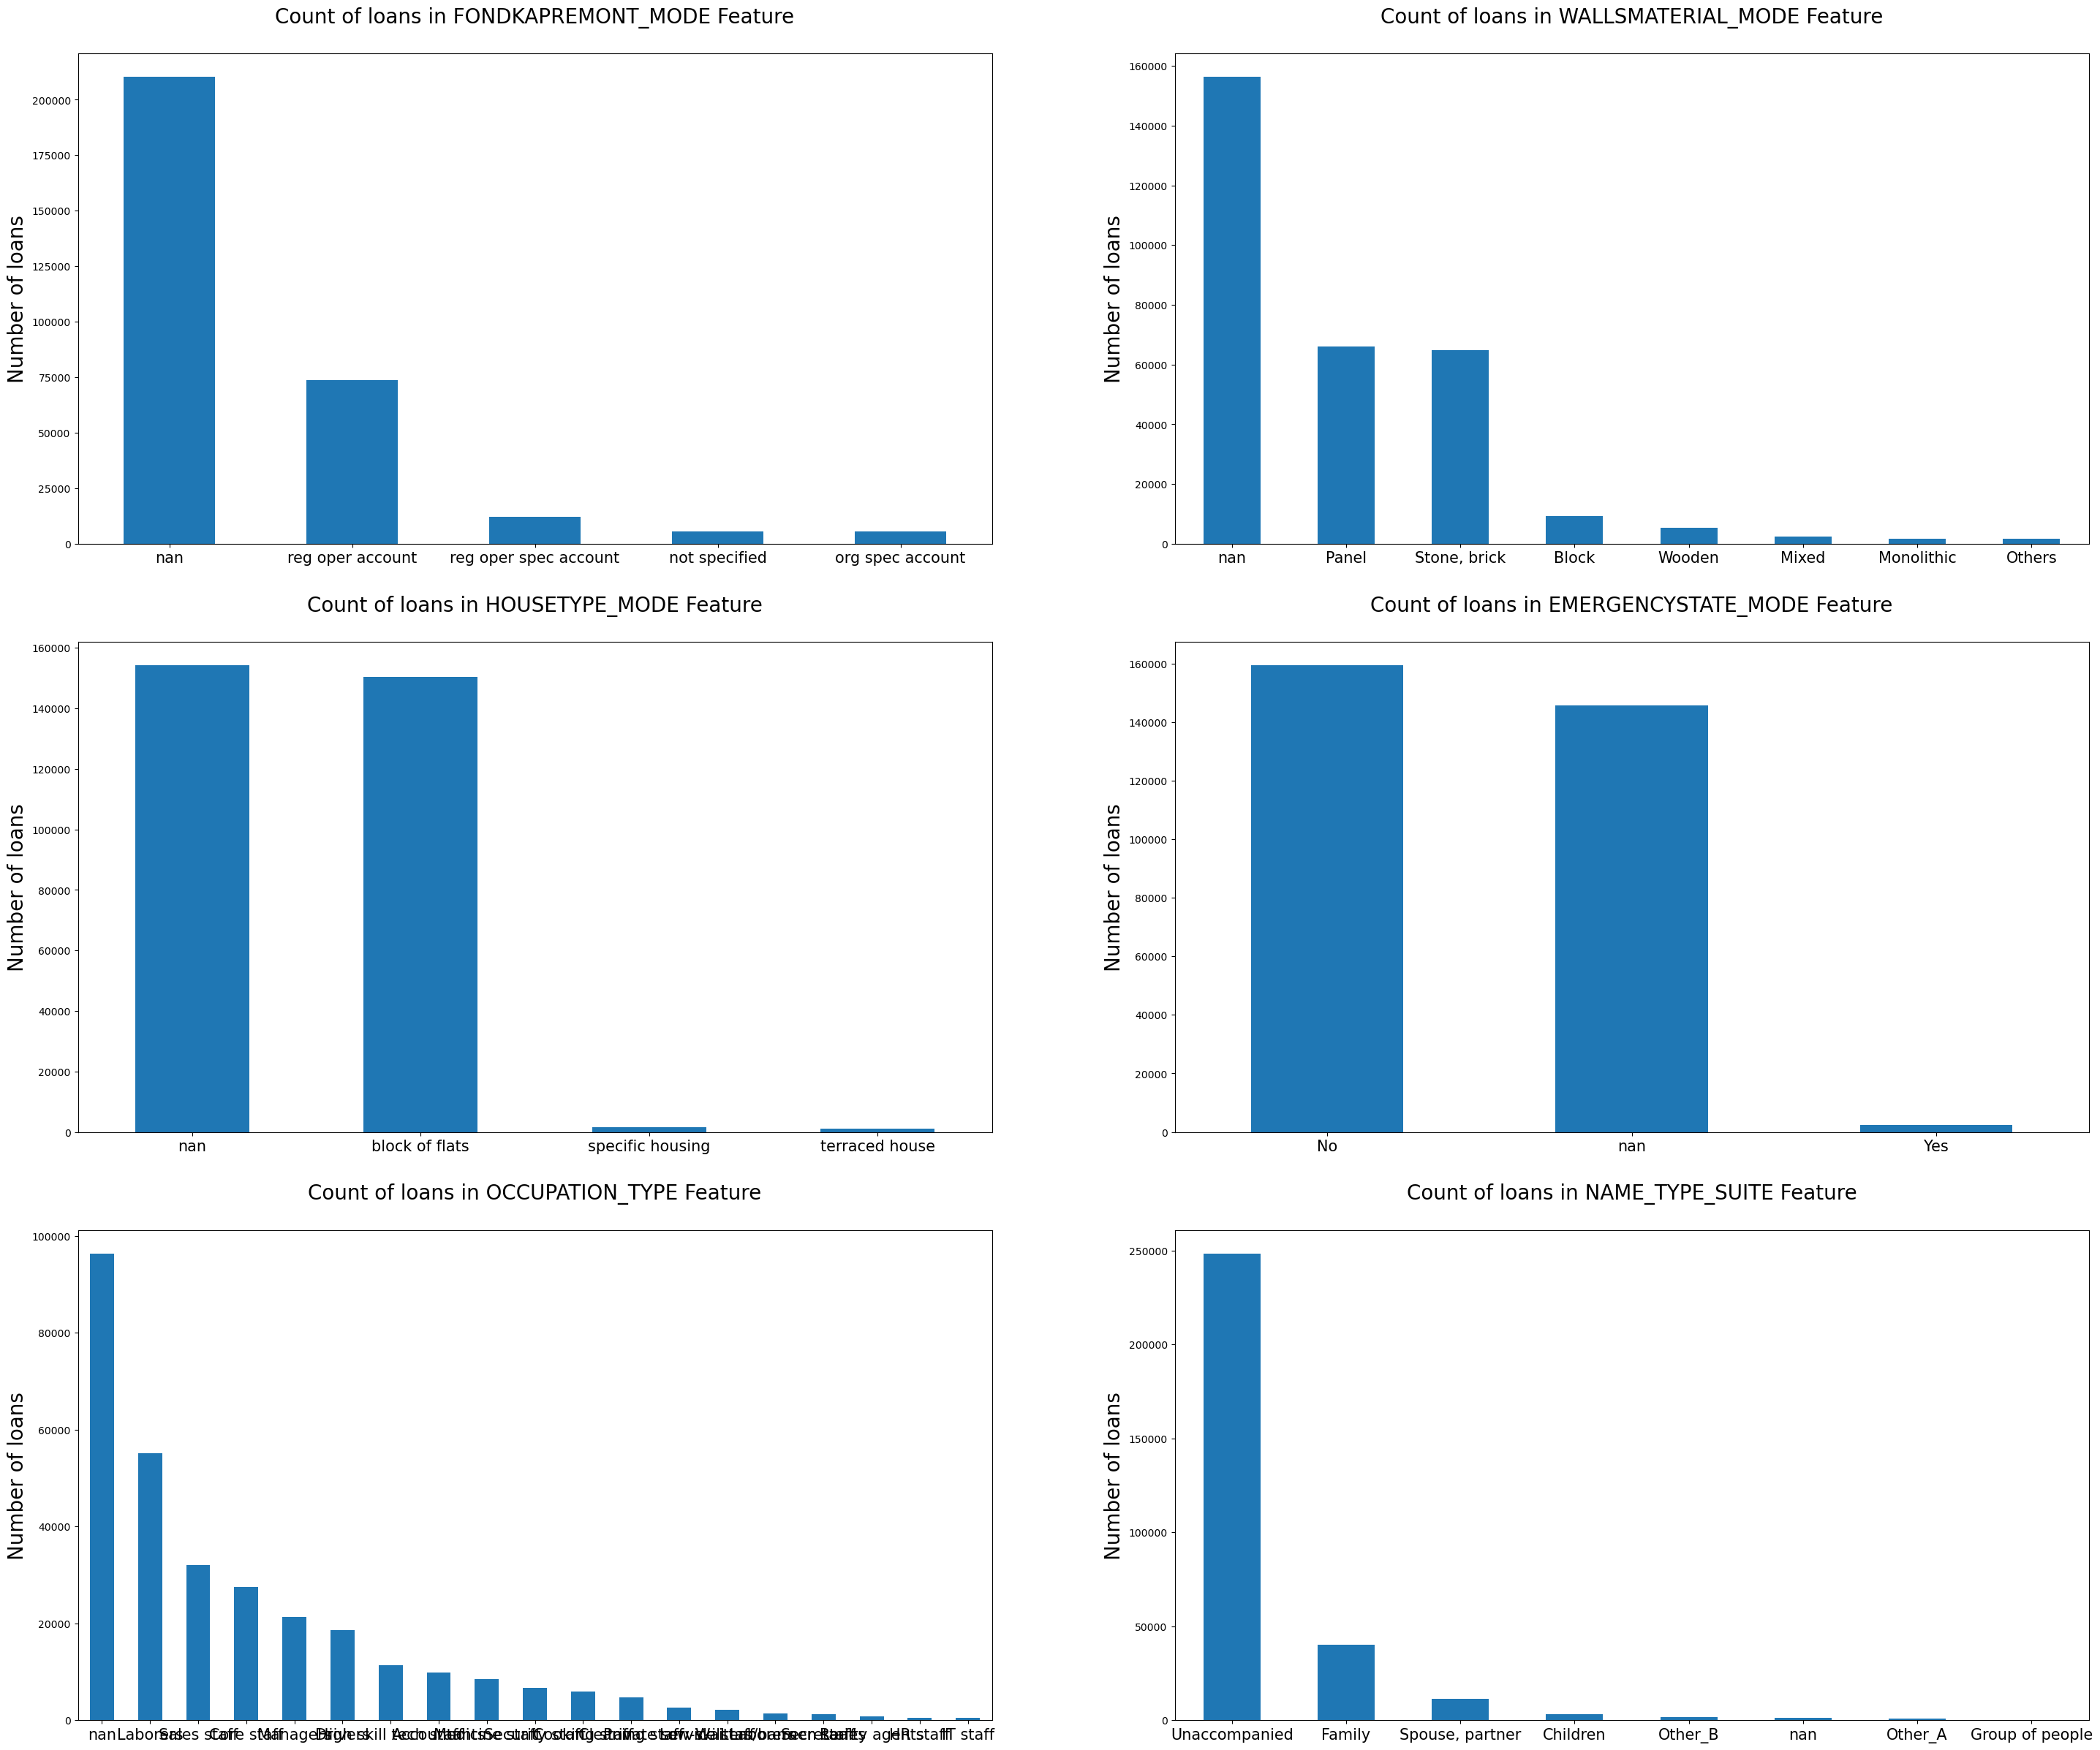

In [39]:
# Create bar charts of categories distribution in missing features
miss_feat = ['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']

fig, axs = plt.subplots(ncols=2, nrows= 3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(miss_feat, 1):
    plt.subplot(3, 2, i)
    train_data[feature].value_counts(dropna=False).plot(kind='bar')
    
    plt.xlabel('')
    plt.xticks(rotation=0, size=15)
    plt.ylabel('Number of loans', size=20)
    plt.title('Count of loans in {} Feature'.format(feature), size=20, y=1.05)
    
plt.show()

In [41]:
# Step 7: Handle Missing Values

# Separate numeric and categorical columns
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Impute missing values
# Numeric columns: use mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
train_data[numeric_cols] = imputer_numeric.fit_transform(train_data[numeric_cols])

# Categorical columns: use most frequent strategy
imputer_categorical = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = imputer_categorical.fit_transform(train_data[categorical_cols])

# Check if there are any more missing values
print(train_data.isnull().sum().sum())  # Should return 0 if all missing values are handled


0


In [47]:
# Step 7: Handle Missing Values

# Separate numeric and categorical columns
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = test_data.select_dtypes(include=['object']).columns

# Impute missing values
# Numeric columns: use mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
test_data[numeric_cols] = imputer_numeric.fit_transform(test_data[numeric_cols])

# Categorical columns: use most frequent strategy
imputer_categorical = SimpleImputer(strategy='most_frequent')
test_data[categorical_cols] = imputer_categorical.fit_transform(test_data[categorical_cols])

# Check if there are any more missing values
print(test_data.isnull().sum().sum())  # Should return 0 if all missing values are handled


0


In [49]:
# Print train dataset missing values stats
missing_values_train = missing_values(train_data)
missing_values_train.head(20)

DataFrame has 0 columns with missing values.


,Missing feature name,% of Total values


In [51]:
# Print train dataset missing values stats
missing_values_train = missing_values(test_data)
missing_values_train.head(20)

DataFrame has 0 columns with missing values.


,Missing feature name,% of Total values


#  Step 8: Encode Categorical Variables


In [53]:
# Step 8: Encode Categorical Variables
le = LabelEncoder()
for col in train_data:
    if train_data[col].dtype == 'object':
        if len(train_data[col].unique()) <= 2:
            train_data[col] = le.fit_transform(train_data[col])
        else:
            train_data = pd.get_dummies(train_data, columns=[col], drop_first=True)


In [55]:
# Step 8: Encode Categorical Variables test_data 
le = LabelEncoder()
for col in test_data:
    if test_data[col].dtype == 'object':
        if len(test_data[col].unique()) <= 2:
            test_data[col] = le.fit_transform(test_data[col])
        else:
            test_data = pd.get_dummies(test_data, columns=[col], drop_first=True)


# outlier

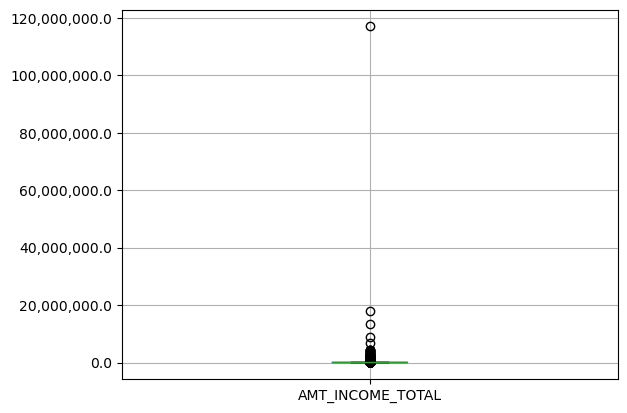

In [57]:
train_data.boxplot(column=['AMT_INCOME_TOTAL'])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(x, ',')))
plt.show()

In [59]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train_data['AMT_INCOME_TOTAL'].describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [61]:
# Step 9: Feature Scaling
scaler = StandardScaler()
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

In [63]:
# Step 9: Feature Scaling test_data 
scaler = StandardScaler()
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[numeric_cols] = scaler.fit_transform(test_data[numeric_cols])

# Handle Imbalanced Data using SMOTE

In [66]:
# Step 10: Handle Imbalanced Data using SMOTE
X = train_data.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = train_data['TARGET']

In [68]:
# Check the unique values in the target column
print(np.unique(y))

# If the target is continuous and should be binary, convert it (assuming 0 and 1 as classes)
# For example, if your target is probabilities or likelihoods and you want to convert to binary:
y = (y > 0.5).astype(int)  # This converts values greater than 0.5 to 1 (default) and others to 0

# Now you can apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


[-0.2963415   3.37448515]


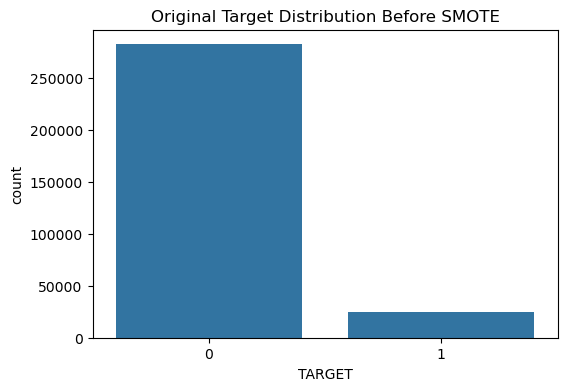

In [69]:
# Step 1: Plot the original target distribution before SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Original Target Distribution Before SMOTE")
plt.show()

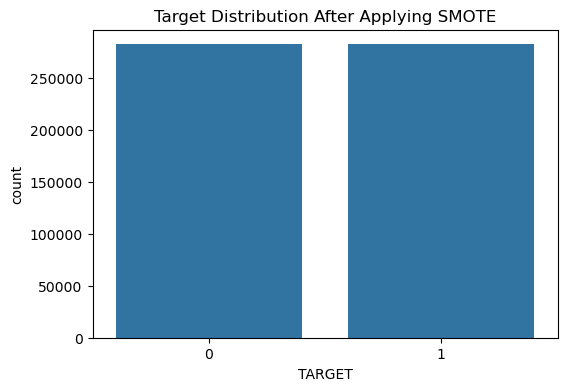

Unique values in y after SMOTE: (array([0, 1]), array([282686, 282686], dtype=int64))


In [70]:
# Step 3: Plot the new target distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res)
plt.title("Target Distribution After Applying SMOTE")
plt.show()

# Check unique values in resampled y
print("Unique values in y after SMOTE:", np.unique(y_res, return_counts=True))

# modeling 

In [75]:
# Step 11: Train Models and Evaluate
# Split data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [76]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict_proba(X_val)[:, 1]
print('Logistic Regression AUC-ROC:', roc_auc_score(y_val, y_pred_logreg))

Logistic Regression AUC-ROC: 0.9709296347365015


In [81]:
# Assuming you have train_data and test_data
X = train_data.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = train_data['TARGET']

# Convert the target to binary if it's not already
y = (y > 0.5).astype(int)

# One-hot encode categorical features in training data
X = pd.get_dummies(X, drop_first=True)

# Apply the same transformation to test_data
test_data_processed = pd.get_dummies(test_data.drop('SK_ID_CURR', axis=1), drop_first=True)

# Align the test data with training data
test_data_processed = test_data_processed.reindex(columns=X.columns, fill_value=0)

# Now, apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred_logreg = logreg.predict_proba(X_val)[:, 1]
print('Logistic Regression AUC-ROC:', roc_auc_score(y_val, y_pred_logreg))

# Now, make predictions
predictions = logreg.predict_proba(test_data_processed)[:, 1]


Logistic Regression AUC-ROC: 0.9709296347365015


In [83]:
print (predictions)

[0.05804474 0.10244286 0.02587119 ... 0.03377411 0.05138963 0.1805641 ]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Step 1: Split the resampled data
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Step 2: Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 3: Predict probabilities for both training and validation sets
y_train_pred_logreg = logreg.predict_proba(X_train)[:, 1]
y_val_pred_logreg = logreg.predict_proba(X_val)[:, 1]

# Step 4: Calculate AUC-ROC for training and validation sets
train_auc_roc = roc_auc_score(y_train, y_train_pred_logreg)
val_auc_roc = roc_auc_score(y_val, y_val_pred_logreg)

# Step 5: Print the results
print('Logistic Regression Training AUC-ROC:', train_auc_roc)
print('Logistic Regression Validation AUC-ROC:', val_auc_roc)


Logistic Regression Training AUC-ROC: 0.9713147422151884
Logistic Regression Validation AUC-ROC: 0.9709296347365015


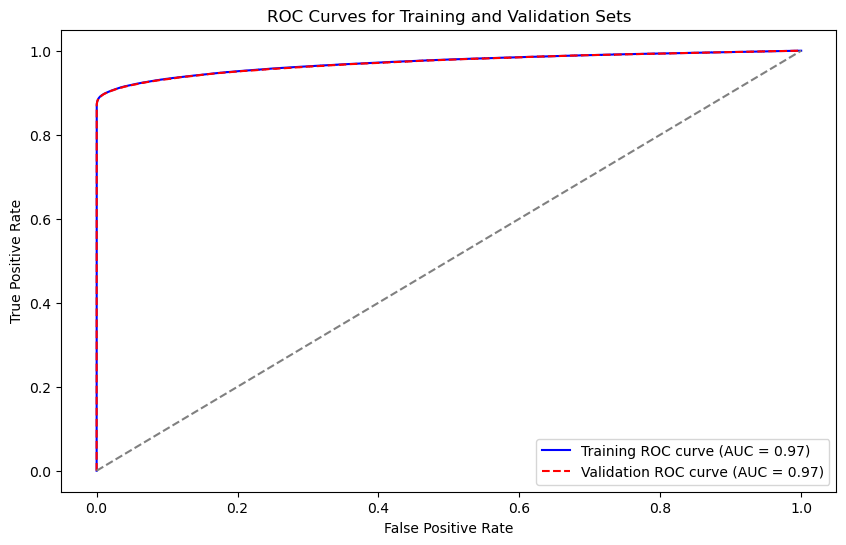

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC curve values for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_logreg)
roc_auc_train = auc(fpr_train, tpr_train)

# Generate ROC curve values for the validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_logreg)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', linestyle='--', label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for random guessing

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Training and Validation Sets')
plt.legend(loc='lower right')
plt.show()


In [41]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_val)[:, 1]
print('Random Forest AUC-ROC:', roc_auc_score(y_val, y_pred_rf))


Random Forest AUC-ROC: 0.9877618958880016


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Initialize model with 100 trees
gb.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_gb = gb.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('Gradient Boosting AUC-ROC:', roc_auc_score(y_val, y_pred_gb))


Gradient Boosting AUC-ROC: 0.9725490241026437


In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

# Train AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)  # Initialize model with 100 trees
ada.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_ada = ada.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('AdaBoost AUC-ROC:', roc_auc_score(y_val, y_pred_ada))


C:\Users\mayar hussien\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost AUC-ROC: 0.9699767722329014


In [86]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

# Train Extra Trees model
et = ExtraTreesClassifier(n_estimators=100, random_state=42)  # Initialize model with 100 trees
et.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_et = et.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('Extra Trees AUC-ROC:', roc_auc_score(y_val, y_pred_et))


Extra Trees AUC-ROC: 0.9872187892085185


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)  # Initialize model
dt.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_dt = dt.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('Decision Tree AUC-ROC:', roc_auc_score(y_val, y_pred_dt))


Decision Tree AUC-ROC: 0.8937959651487334


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Train K-Nearest Neighbors model
knn = KNeighborsClassifier()  # Initialize model
knn.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_knn = knn.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('K-Nearest Neighbors AUC-ROC:', roc_auc_score(y_val, y_pred_knn))


K-Nearest Neighbors AUC-ROC: 0.9512127395416454


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Train Gaussian Naive Bayes model
gnb = GaussianNB()  # Initialize model
gnb.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_gnb = gnb.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('Gaussian Naive Bayes AUC-ROC:', roc_auc_score(y_val, y_pred_gnb))


Gaussian Naive Bayes AUC-ROC: 0.6649702790584128


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

# Train Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()  # Initialize model
lda.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_lda = lda.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('Linear Discriminant Analysis AUC-ROC:', roc_auc_score(y_val, y_pred_lda))


Linear Discriminant Analysis AUC-ROC: 0.9684317637162052


Training AUC-ROC: 0.97
Validation AUC-ROC: 0.97


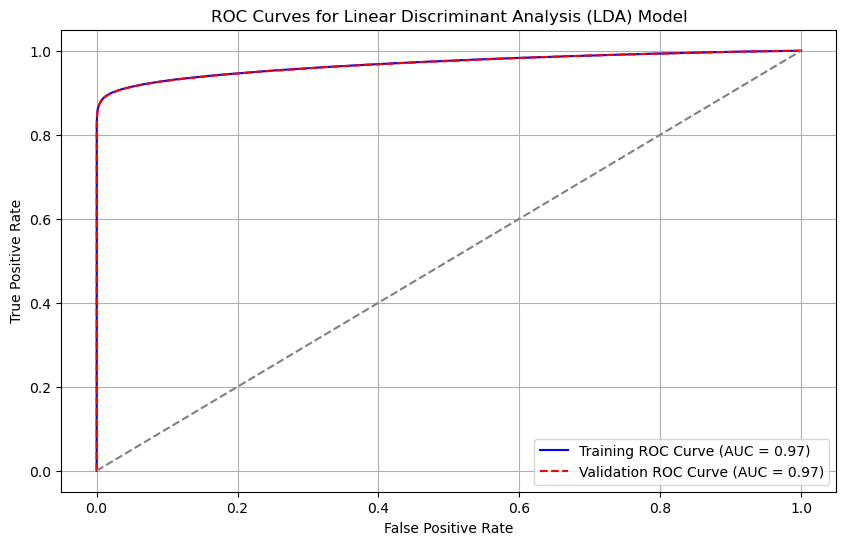

In [86]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score

# Train Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for both training and validation sets
y_pred_train = lda.predict_proba(X_train)[:, 1]  # Training set probabilities
y_pred_val = lda.predict_proba(X_val)[:, 1]      # Validation set probabilities

# Calculate AUC scores
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)

# Print AUC scores
print(f'Training AUC-ROC: {auc_train:.2f}')
print(f'Validation AUC-ROC: {auc_val:.2f}')

# Calculate ROC curve data
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', linestyle='--', label=f'Validation ROC Curve (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear Discriminant Analysis (LDA) Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [42]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

# Train Ridge Classifier model
ridge = RidgeClassifier()  # Initialize model
ridge.fit(X_train, y_train)  # Fit the model on the training data

# Get decision function scores for the validation set
y_score_ridge = ridge.decision_function(X_val)  # Get decision function scores instead of probabilities

# Calculate and print AUC-ROC score
print('Ridge Classifier AUC-ROC:', roc_auc_score(y_val, y_score_ridge))


Ridge Classifier AUC-ROC: 0.9684317527666912


Training AUC-ROC: 0.97
Validation AUC-ROC: 0.97


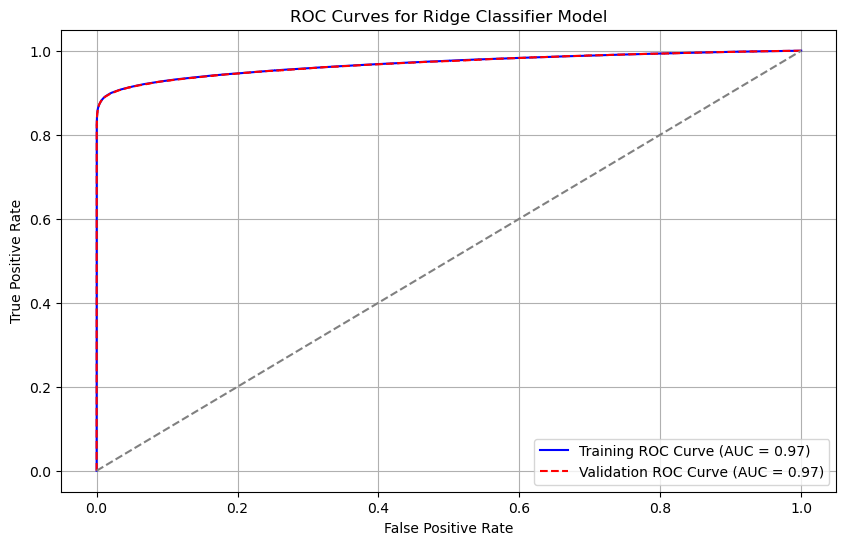

In [84]:
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Train Ridge Classifier model
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)  # Fit the model on the training data

# Get decision function scores for both training and validation sets
y_score_train = ridge.decision_function(X_train)  # Training decision scores
y_score_val = ridge.decision_function(X_val)      # Validation decision scores

# Calculate AUC scores
auc_train = roc_auc_score(y_train, y_score_train)
auc_val = roc_auc_score(y_val, y_score_val)

# Print AUC scores
print(f'Training AUC-ROC: {auc_train:.2f}')
print(f'Validation AUC-ROC: {auc_val:.2f}')

# Calculate ROC curve data
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
fpr_val, tpr_val, _ = roc_curve(y_val, y_score_val)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', linestyle='--', label=f'Validation ROC Curve (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Ridge Classifier Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [44]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score

# Train Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)  # Initialize model
perceptron.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_perceptron = perceptron.predict(X_val)  # Get the predicted classes

# Since Perceptron does not provide probabilities directly, we will use a workaround for AUC
y_pred_perceptron_proba = (y_pred_perceptron + 1) / 2  # Convert to probability-like scores (0 or 1)

# Calculate and print AUC-ROC score
print('Perceptron AUC-ROC:', roc_auc_score(y_val, y_pred_perceptron_proba))


Perceptron AUC-ROC: 0.9175064159709656


Training AUC-ROC: 0.92
Validation AUC-ROC: 0.92


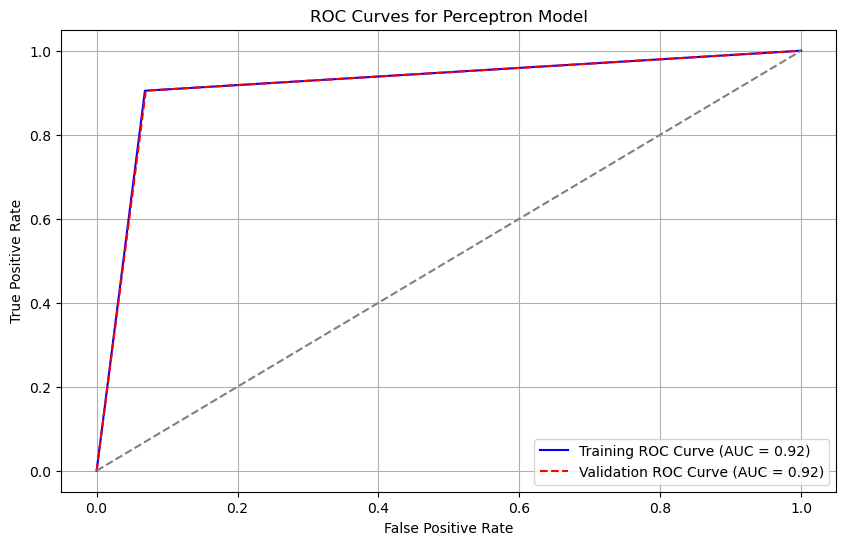

In [82]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, roc_auc_score

# Train Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Predict classes for training and validation sets
y_pred_train = perceptron.predict(X_train)
y_pred_val = perceptron.predict(X_val)

# Convert to probability-like scores (0 or 1)
y_pred_train_proba = (y_pred_train + 1) / 2  # Train set probabilities
y_pred_val_proba = (y_pred_val + 1) / 2      # Validation set probabilities

# Calculate AUC scores
auc_train = roc_auc_score(y_train, y_pred_train_proba)
auc_val = roc_auc_score(y_val, y_pred_val_proba)

# Print AUC scores
print(f'Training AUC-ROC: {auc_train:.2f}')
print(f'Validation AUC-ROC: {auc_val:.2f}')

# Calculate ROC curve data
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val_proba)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', linestyle='--', label=f'Validation ROC Curve (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Perceptron Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import re

# Clean the feature names in both X_train and X_val
def clean_column_names(df):
    df.columns = [re.sub(r'[<>[\]]', '', str(col)) for col in df.columns]
    return df

X_train = clean_column_names(X_train)
X_val = clean_column_names(X_val)

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)  # Initialize model
xgb.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_xgb = xgb.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('XGBoost AUC-ROC:', roc_auc_score(y_val, y_pred_xgb))


C:\Users\mayar hussien\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:57:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost AUC-ROC: 0.979075139939857


C:\Users\mayar hussien\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training AUC-ROC: 0.98
Validation AUC-ROC: 0.98


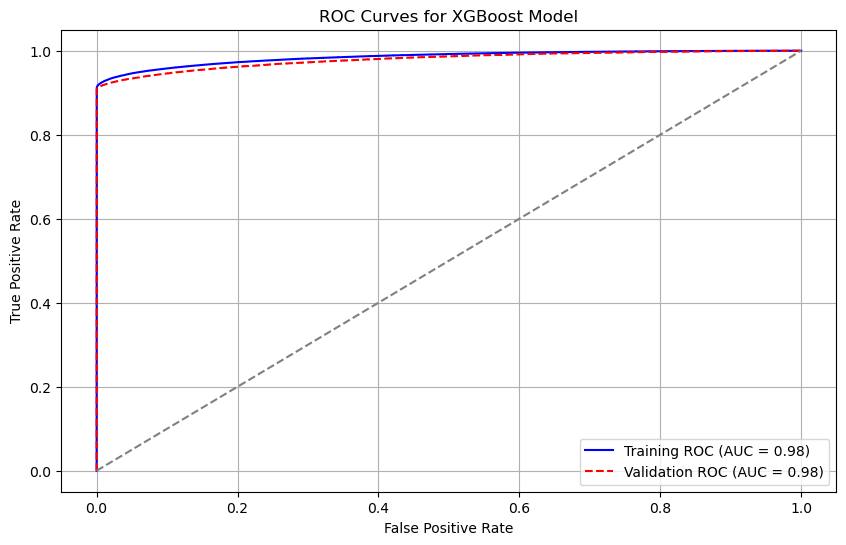

In [76]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import re

# Clean the feature names to remove unsupported characters
def clean_column_names(df):
    df.columns = [re.sub(r'[<>[\]]', '', str(col)) for col in df.columns]
    return df

# Clean the training and validation sets
X_train = clean_column_names(X_train)
X_val = clean_column_names(X_val)

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgb.fit(X_train, y_train)

# Get predicted probabilities for training and validation sets
y_pred_train = xgb.predict_proba(X_train)[:, 1]
y_pred_val = xgb.predict_proba(X_val)[:, 1]

# Calculate AUC scores
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)

# Print AUC scores
print(f'Training AUC-ROC: {auc_train:.2f}')
print(f'Validation AUC-ROC: {auc_val:.2f}')

# Plot ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', linestyle='--', label=f'Validation ROC (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [58]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import re

# Clean the feature names to remove unsupported characters
def clean_column_names(df):
    df.columns = [re.sub(r'[{}[\]:"\',]', '', str(col)) for col in df.columns]
    return df

# Apply cleaning to both training and validation sets
X_train = clean_column_names(X_train)
X_val = clean_column_names(X_val)

# Train LightGBM model
lgb = LGBMClassifier(n_jobs=-1)  # Initialize model
lgb.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for the validation set
y_pred_lgb = lgb.predict_proba(X_val)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate and print AUC-ROC score
print('LightGBM AUC-ROC:', roc_auc_score(y_val, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 226147, number of negative: 226150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.290418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33602
[LightGBM] [Info] Number of data points in the train set: 452297, number of used features: 269
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000013
[LightGBM] [Info] Start training from score -0.000013
LightGBM AUC-ROC: 0.9788703712015138


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 226147, number of negative: 226150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.694302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33602
[LightGBM] [Info] Number of data points in the train set: 452297, number of used features: 269
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499997 -> initscore=-0.000013
[LightGBM] [Info] Start training from score -0.000013
Training AUC-ROC: 0.98
Validation AUC-ROC: 0.98


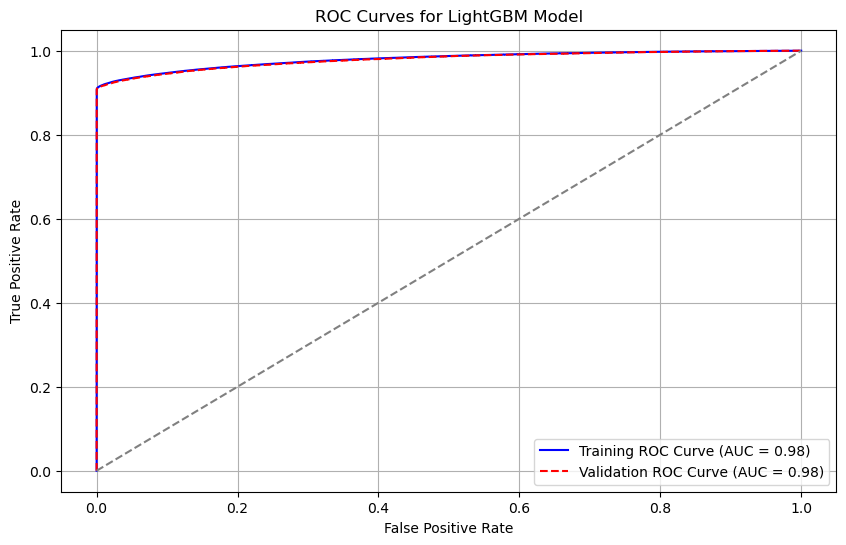

In [78]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import re

# Clean the feature names to remove unsupported characters
def clean_column_names(df):
    df.columns = [re.sub(r'[{}[\]:"\',]', '', str(col)) for col in df.columns]
    return df

# Clean the training and validation sets
X_train = clean_column_names(X_train)
X_val = clean_column_names(X_val)

# Train LightGBM model
lgb = LGBMClassifier(n_jobs=-1)  # Initialize model
lgb.fit(X_train, y_train)  # Fit the model on the training data

# Predict probabilities for both training and validation sets
y_pred_train = lgb.predict_proba(X_train)[:, 1]
y_pred_val = lgb.predict_proba(X_val)[:, 1]

# Calculate AUC scores
auc_train = roc_auc_score(y_train, y_pred_train)
auc_val = roc_auc_score(y_val, y_pred_val)

# Print AUC scores
print(f'Training AUC-ROC: {auc_train:.2f}')
print(f'Validation AUC-ROC: {auc_val:.2f}')

# Calculate ROC curve data
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', linestyle='--', label=f'Validation ROC Curve (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LightGBM Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Final Cell: Results Visualization

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, Perceptron
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Ridge Classifier': RidgeClassifier(),
    'Perceptron': Perceptron(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Train each model and calculate AUC-ROC score
results = {}

for name, model in models.items():
    model.fit(X_res, y_res)
    
    if hasattr(model, "predict_proba"):
        y_pred = model.predict_proba(X_res)[:, 1]
    else:
        y_pred = model.decision_function(X_res)
    
    auc_score = roc_auc_score(y_res, y_pred)
    results[name] = auc_score
    print(f'{name} AUC-ROC: {auc_score:.4f}')

print("\nAUC-ROC Scores for all models:")
for model_name, auc in results.items():
    print(f"{model_name}: {auc:.4f}")


Random Forest AUC-ROC: 1.0000
Gradient Boosting AUC-ROC: 0.9731


C:\Users\mayar hussien\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost AUC-ROC: 0.9592
Extra Trees AUC-ROC: 1.0000
Decision Tree AUC-ROC: 1.0000
K-Nearest Neighbors AUC-ROC: 0.9999


In [ ]:
# Step 14: Create the Submission File
submission = pd.DataFrame({
    'SK_ID_CURR': test_data['SK_ID_CURR'],
    'TARGET': predictions
})
submission.to_csv('submission.csv', index=False)

print('Submission file created.')

# deep learning 

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_res and y_res are your preprocessed features and target labels
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the neural network model with an Input layer
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_val_scaled, y_val), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1,
                    callbacks=[early_stopping])

# Predict probabilities on validation set
y_pred_dl = model.predict(X_val_scaled).flatten()

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_val, y_pred_dl)
print('Deep Learning AUC-ROC:', auc_score)


Epoch 1/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - AUC: 0.9476 - loss: 0.2528 - val_AUC: 0.9738 - val_loss: 0.1603
Epoch 2/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - AUC: 0.9712 - loss: 0.1681 - val_AUC: 0.9745 - val_loss: 0.1564
Epoch 3/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - AUC: 0.9723 - loss: 0.1647 - val_AUC: 0.9748 - val_loss: 0.1565
Epoch 4/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - AUC: 0.9726 - loss: 0.1619 - val_AUC: 0.9750 - val_loss: 0.1543
Epoch 5/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - AUC: 0.9729 - loss: 0.1608 - val_AUC: 0.9752 - val_loss: 0.1544
Epoch 6/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - AUC: 0.9730 - loss: 0.1605 - val_AUC: 0.9750 - val_loss: 0.1547
Epoch 7/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - AUC: 0.9740 - loss: 0.1576 - val_AUC: 0.9752 - val_loss: 0.1541
Epoch 8/50
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - AUC: 0.9738 - loss: 0.1583 - val_AUC: 0.9753 - val_loss: 0.1536
Epoch 9/50
14135